## K-Nearest neighbor(KNN) classifier for linearly seperable classes

Accuracy for k=1: 1.0000
Accuracy for k=3: 1.0000
Accuracy for k=5: 1.0000
Accuracy for k=7: 1.0000
Accuracy for k=9: 1.0000
Accuracy for k=11: 1.0000
Accuracy for k=15: 1.0000
Best k value: 1 with accuracy: 1.0000
Test Accuracy for best k=1: 1.0000


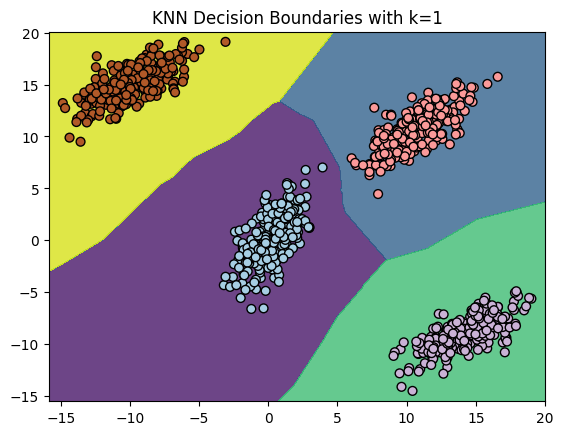

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
def load_data(file_path):
    data = np.loadtxt(file_path)  # assuming space-separated values
    X = data[:, :-1]  # all columns except the last one (features)
    y = data[:, -1]   # the last column (class labels)
    return X, y

# Load your data
X_train,y_train = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\linearlySeparable\combined_dataset_train.txt')
X_val, y_val = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\linearlySeparable\comb_dataset_val.txt')
X_test, y_test = load_data(r'C:\Users\raksh\IML-project-dec-2024\classification_datasets\linearlySeparable\combined_dataset_train.txt')
# Experimentally choosing the best k
k_values = [1, 3, 5, 7, 9, 11, 15]  # List of k values to experiment with
best_k = 1
best_accuracy = 0

# Testing different k values
for k in k_values:
    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model on the training data
    knn.fit(X_train, y_train)
    
    # Predict on the validation set
    y_val_pred = knn.predict(X_val)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"Accuracy for k={k}: {accuracy:.4f}")
    
    # Update the best k if current k gives better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k} with accuracy: {best_accuracy:.4f}")

# Final model evaluation on the test set with best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_test_pred = knn_final.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy for best k={best_k}: {test_accuracy:.4f}")

if X_train.shape[1] == 2:
    h = .02  # Step size in the mesh
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = knn_final.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', s=40, cmap=plt.cm.Paired)
    plt.title(f"KNN Decision Boundaries with k={best_k}")
    plt.show()


### For linearly separable classes, the KNN classifier with k = 1 (nearest neighbor classifier) performs optimally and is equivalent to the nearest neighbor classifier. 